In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Prepare MNIST data
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root='data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=1000)



## Visualization

In [4]:
images, labels = next(iter(train_loader))
print(images.shape)

print(f"There are {len(labels)} classes.")
print(labels)

torch.Size([64, 1, 28, 28])
There are 64 classes.
tensor([5, 9, 5, 6, 6, 1, 0, 0, 0, 7, 3, 2, 0, 8, 1, 0, 1, 8, 6, 3, 5, 8, 7, 6,
        9, 7, 3, 7, 8, 0, 9, 8, 4, 9, 4, 8, 4, 7, 1, 0, 5, 3, 2, 7, 6, 2, 1, 5,
        9, 0, 9, 5, 6, 9, 5, 2, 0, 2, 9, 8, 6, 2, 5, 4])


In [5]:
images[0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

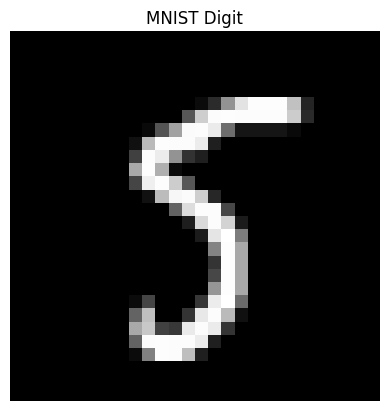

In [6]:
import matplotlib.pyplot as plt
import torch

# Let's assume your tensor is a 28x28 grayscale image
image = images[0][0]  # shape: (28, 28) or (1, 28, 28)

# If it has a channel dimension (1, 28, 28), remove it
if image.ndim == 3:
    image = image.squeeze(0)

# Plot the image
plt.imshow(image.numpy(), cmap='gray')
plt.title("MNIST Digit")
plt.axis('off')
plt.show()

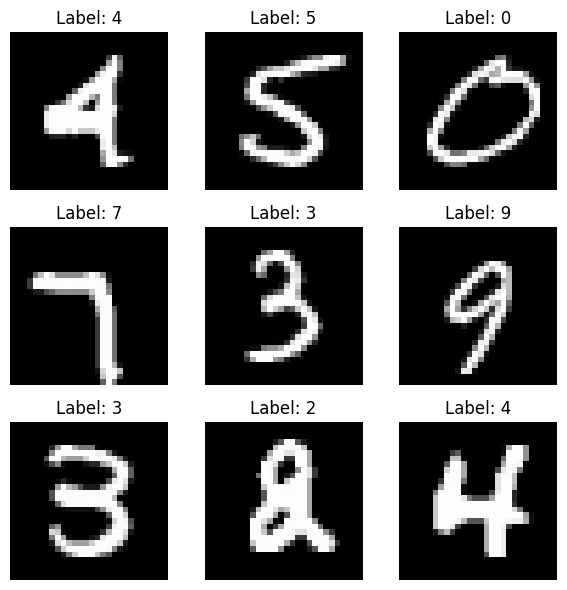

In [7]:
import matplotlib.pyplot as plt
# Get one batch
images, labels = next(iter(train_loader))

# Visualize first 9 images
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    img = images[i][0].numpy()  # shape: [1, 28, 28] → [28, 28]
    label = labels[i].item()
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

## Training

In [10]:
# 3. Define Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define a neural network model using nn.Sequential for a simple feedforward network
        self.model = nn.Sequential(
            nn.Flatten(),              # Flattens the 28x28 input image into a 1D tensor of size 784
            nn.Linear(28*28, 128),     # Fully connected layer from 784 input features to 128 output features
            nn.ReLU(),                 # ReLU activation function introduces non-linearity. Max(0, x)
            nn.Linear(128, 10)         # Fully connected layer from 128 features to 10 classes (for classification)
        )
        
    def forward(self, x):
        return self.model(x)

model = SimpleNN().to(device)
# 4. Set Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(model)
print(criterion)
print(optimizer)

SimpleNN(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)
CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [11]:
# 5. Training Loop
# Train the model for 5 epochs
for epoch in range(5):
    model.train()  # Set the model to training mode (important for layers like dropout or batchnorm)
    # Loop over each batch of images and labels in the training dataset
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device) # Move the data to the specified device (CPU or GPU)
        outputs = model(images) # Forward pass: compute the model's predictions. first layer: h1 = ReLU(xW_1+b_1), second layer: z = h1W_2+b_2 -> y = softmax(z)
        loss = criterion(outputs, labels) # Compute the loss between predictions and true labels -> E.g. Cross entropy loss. (For each batch - 64 times, then average)
        optimizer.zero_grad() # Zero out gradients from the previous step (otherwise they'd accumulate) -> Clear out old gradients
        loss.backward() # Backward pass: compute gradients of the loss with respect to model parameters -> Applies backward propagation
        optimizer.step() # Update the model parameters using the optimizer -> Update weights e.g. w2 <- w2 - eta *dl/dw2, w1 <- w1 - eta*dl/dw1
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.0795
Epoch 2, Loss: 0.2309
Epoch 3, Loss: 0.0355
Epoch 4, Loss: 0.0155
Epoch 5, Loss: 0.0136


## Testing

In [ ]:
# 6. Test Accuracy
model.eval() # Set the model to evaluation mode (important for layers like dropout or batchnorm)
correct = 0
total = 0

with torch.no_grad(): # Disables gradient tracking. Reduces memory usage and speeds up computation during inference, since we don’t need gradients.
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device) # Moves the images and labels to the same device as the model (CPU or GPU).
        outputs = model(images) # Feeds batch of 1000 images through the model to get predictions.
        _, predicted = torch.max(outputs.data, 1) # returns both the max value and its index across class dimension.
        print(len(predicted))
        total += labels.size(0) # Adds the number of labels in the batch to the total number of samples.
        correct += (predicted == labels).sum().item() # Compares predicted labels to true labels. .sum() counts the number of correct predictions in the batch. .item() converts the tensor to a Python integer and adds it to the running total.

print(f"Test Accuracy: {100 * correct / total:.2f}%")

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Test Accuracy: 97.45%


In [43]:
torch.save(model.state_dict(), "model_weights.pth")

In [23]:
import torch

# Make sure the model is on CPU and in evaluation mode
model.cpu()
model.eval()

# Provide dummy input (shape must match real input during training)
# For example: MNIST = (batch_size, 1 channel, 28x28)
dummy_input = torch.randn(1, 1, 28, 28)

# Export the model to ONNX
torch.onnx.export(
    model,                         # Trained model to export
    dummy_input,                   # Dummy input for tracing
    "model.onnx",                  # Output filename
    input_names=["input"],         # Input name
    output_names=["output"],       # Output name
    dynamic_axes={                 # Dynamic batch size
        "input": {0: "batch_size"},
        "output": {0: "batch_size"}
    },
    opset_version=11               # ONNX version to use
)

In [13]:
model.state_dict()

OrderedDict([('model.1.weight',
              tensor([[ 0.0114,  0.0115,  0.0063,  ..., -0.0139, -0.0314, -0.0347],
                      [ 0.0107,  0.0118, -0.0303,  ..., -0.0224,  0.0228,  0.0265],
                      [ 0.0355, -0.0021, -0.0262,  ...,  0.0290,  0.0037, -0.0077],
                      ...,
                      [ 0.0103,  0.0207, -0.0252,  ...,  0.0036,  0.0325, -0.0016],
                      [-0.0113,  0.0080,  0.0276,  ..., -0.0305,  0.0166, -0.0073],
                      [ 0.0067,  0.0181, -0.0339,  ..., -0.0187,  0.0209, -0.0348]])),
             ('model.1.bias',
              tensor([-0.0728,  0.2534,  0.0998,  0.0010,  0.0250, -0.0660, -0.0518,  0.0585,
                       0.0661,  0.0834,  0.0881,  0.1944,  0.0032,  0.0121,  0.0347, -0.0585,
                      -0.0030, -0.0693,  0.0368,  0.1021,  0.0248,  0.1490,  0.1141, -0.0365,
                      -0.0012, -0.0518, -0.0677, -0.0163,  0.0107,  0.0807,  0.0265,  0.1970,
                       0.065

In [20]:
print("'model.1.weight'", model.state_dict()['model.1.weight'].shape)
print("'model.1.bias'", model.state_dict()['model.1.bias'].shape)
print("'model.3.weight'", model.state_dict()['model.3.weight'].shape)
print("'model.3.bias'", model.state_dict()['model.3.bias'].shape)

'model.1.weight' torch.Size([128, 784])
'model.1.bias' torch.Size([128])
'model.3.weight' torch.Size([10, 128])
'model.3.bias' torch.Size([10])
